## Let's make a 2d plot with axes on the sides!
Load some useful modules, then the data

In [106]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib as mpl

In [107]:
fname = 'lMgal_zform_rates_Z0.1PP04.npy'
outname = fname[:-len('.npy')]+'_2dplot.png'

In [108]:
logM,zform,rate= load(fname)
rate = rate/10.    #puts the rate in Gpc^-3 yr^-1
lograte = log10(rate)

Convert zform into lookback time:

In [109]:
Om = 0.3; Ol = 0.7; h = 0.7
from yt.utilities.cosmology import Cosmology
cosmo = Cosmology(hubble_constant=h,omega_matter=Om,omega_lambda=Ol)
tform = array([cosmo.lookback_time(0,z).in_units('Gyr').item() for z in zform])

##### Sum up the data in the vertical and horizontal direction:

In [110]:
uniqM = unique(logM)    #always working in logspace
uniqt = unique(tform) 

uniqM is the x array for the top plot; uniqt is the y array for the right plot (but the dependant axis)

Now I need to sum along each axis:

In [111]:
rate_top = empty_like(uniqM)
rate_right = empty_like(uniqt)

# dlogM = 0.2
# dt = 1e8  #years

for ii in range(uniqM.shape[0]):  
    rate_top[ii] = rate[logM==uniqM[ii]].sum()   #*dt   #don't multiply by dt because Astrid already did it
for ii in range(uniqt.shape[0]):
    rate_right[ii] = rate[tform==uniqt[ii]].sum()  #*dlogM #don't multiply by dlogM because Astrid already did it

Grid the data using a function I have

In [112]:
from mytools import griddata
Mgrid,Tgrid,Rgrid = griddata(logM,tform,rate)

In [113]:
print min(log10(Rgrid.flatten())),max(log10(Rgrid.flatten())) 
print tform.min(),tform.max()
print zform.min(),zform.max()
print cosmo.lookback_time(0,0.1).in_units('Gyr')   #from Ned Wright, should be 1.3 Gyr

-3.96850821899 2.53381561554
1.30117056596 12.8321366978
0.1 7.95
1.30117056596 Gyr


##### Make the plot!

In [127]:
xtickloc = [7,8,9,10,11]
xtickstr = ['$'+str(kk)+'$' for kk in xtickloc]

ytickloc = [0,2,4,6,8,10,12]
ytickstr = ['$'+str(kk)+'$' for kk in ytickloc]

toptickloc = [3,3.5,4,4.5]
toptickstr = ['$'+str(kk)+'$' for kk in toptickloc]

righttickloc = [1,2,3,4]
righttickstr = ['$'+str(kk)+'$' for kk in righttickloc]

ctickloc = [-3.5,-0.5,2.5]
ctickstr = ['$'+str(kk)+'$' for kk in ctickloc]

fontsize = 24

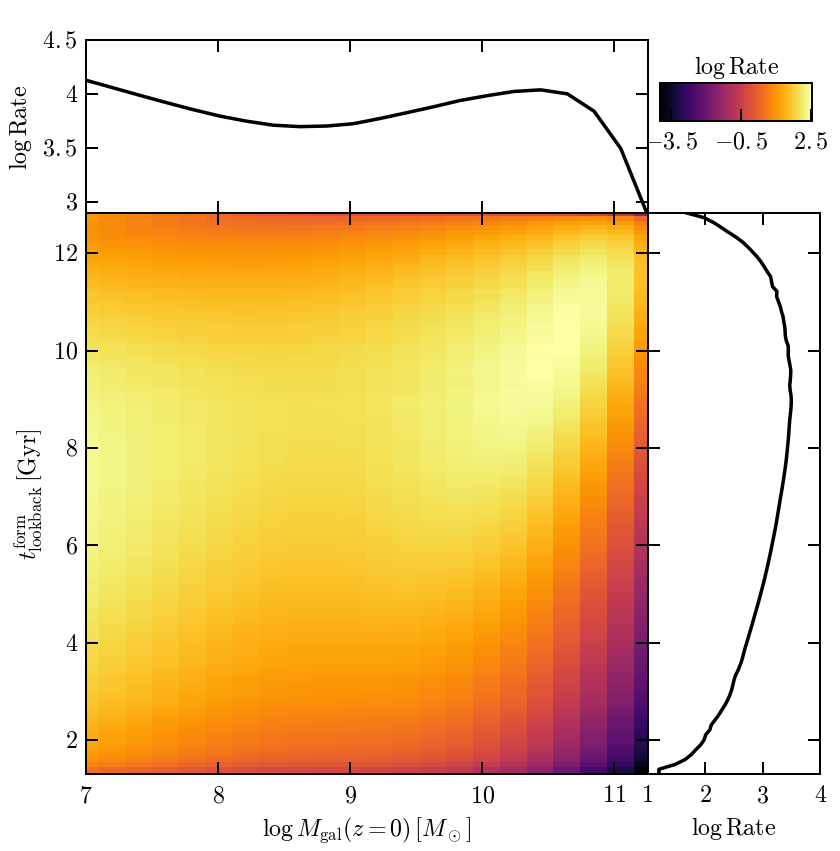

In [128]:
fig = plt.figure(figsize=(12,12))
main_ax = plt.axes([0.1,0.1,0.65,0.65])
top_ax = plt.axes([0.1,0.75,0.65,0.2],sharex=main_ax)
right_ax = plt.axes([0.75,0.1,0.2,0.65],sharey=main_ax)
vertical_cbar = False

if vertical_cbar:
#     cax = plt.axes([0.825,0.825,0.05,0.175])
    cax = plt.axes([0.785,0.815,0.05,0.15])
else:
    cax = plt.axes([0.765,0.825,0.175,0.15])
# cax = plt.axes([0.8,0.8,0.2,0.2])
    
cax.set_axis_off()
plt.setp(top_ax.get_xticklabels(),visible=False)
plt.setp(right_ax.get_yticklabels(),visible=False)

im = main_ax.pcolormesh(Mgrid,Tgrid,log10(Rgrid),cmap='inferno')   #,vmin=vmin,vmax=vmax)

top_ax.plot(uniqM,log10(rate_top),'k-',lw=3.5)
right_ax.plot(log10(rate_right),uniqt,'k-',lw=3.5)

main_ax.set_xlabel(r'$\log\,M_\mathrm{gal}(z = 0)\,[M_\odot]$',fontsize=fontsize)
main_ax.set_ylabel(r'$t_\mathrm{lookback}^\mathrm{form}\,\mathrm{[Gyr]}$',fontsize=fontsize)
right_ax.set_xlabel(r'$\log\,\mathrm{Rate}$',fontsize=fontsize)
top_ax.set_ylabel(r'$\log\,\mathrm{Rate}$',fontsize=fontsize)

main_ax.set_xticks(xtickloc)
main_ax.set_xticklabels(xtickstr,fontsize=fontsize)

main_ax.set_yticks(ytickloc)
main_ax.set_yticklabels(ytickstr,fontsize=fontsize)

main_ax.set_xlim(logM.min(),logM.max())
top_ax.set_xlim(main_ax.get_xlim())

main_ax.set_ylim(tform.min(),tform.max())
right_ax.set_ylim(main_ax.get_ylim())

top_ax.set_ylim(2.9,4.5)
right_ax.set_xlim(1,4)

top_ax.set_yticks(toptickloc)
top_ax.set_yticklabels(toptickstr,fontsize=fontsize)

right_ax.set_xticks(righttickloc)
right_ax.set_xticklabels(righttickstr,fontsize=fontsize)

# loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
# right_ax.xaxis.set_major_locator(loc)
# top_ax.yaxis.set_major_locator(loc)

# norm = mpl.colors.Normalize(vmin=min(log10(Rgrid.flatten())), vmax=max(log10(Rgrid.flatten())))
# cbar = mpl.colorbar.ColorbarBase(cax,cmap='inferno',norm=norm,orientation='horizontal')
# cbar.set_label('test')

cbar = plt.colorbar(im,orientation='horizontal',fraction=0.5,aspect=4)

cbar.set_label(r'$\log\,\mathrm{Rate}$',fontsize=fontsize,labelpad=-100,horizontalalignment='center')
cbar.set_ticks(ctickloc)
cbar.set_ticklabels(ctickstr)
for t in cbar.ax.xaxis.get_ticklabels():
    t.set_fontsize(fontsize)
    
# cax.set_xlabel(r'$\log_{10}(Rate)$',fontsize=24)
# plt.figtext(0.81,0.815+0.155,r'$\log\,\mathrm{Rate}$',fontsize=24,ha='left',va='bottom')

plt.savefig(outname)